In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
path="/content/drive/MyDrive/MachineLearning/titanic.csv"

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


df=pd.read_csv(path)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


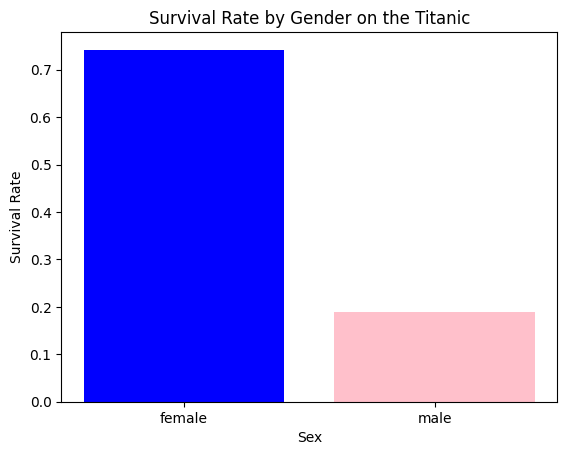

In [24]:
import matplotlib.pyplot as plt
survival_rate = df.groupby('Sex')['Survived'].mean()

# Create a bar chart
plt.bar(survival_rate.index, survival_rate.values, color=['blue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender on the Titanic')
plt.show()


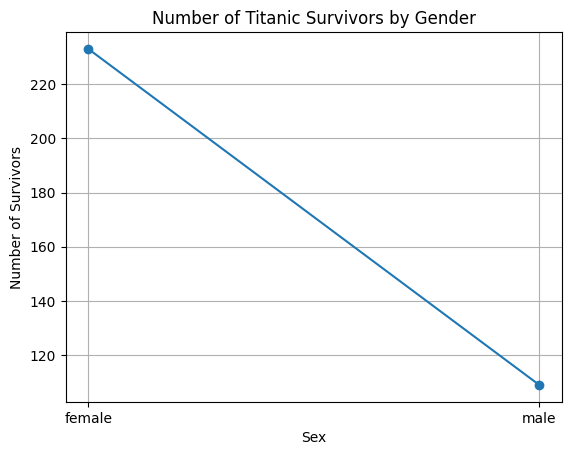

In [25]:
survivor_counts = df.groupby('Sex')['Survived'].sum()

# Create a linear graph (line plot)
plt.plot(survivor_counts.index, survivor_counts.values, marker='o', linestyle='-')
plt.xlabel('Sex')
plt.ylabel('Number of Survivors')
plt.title('Number of Titanic Survivors by Gender')
plt.grid(True)
plt.show()

In [7]:
input=df[["Pclass","Sex","Age","Fare"]]

In [8]:
input

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [9]:
target=df.Survived

In [10]:
input["Sex"]=input.Sex.map({"male":1,"female":2})

<ipython-input-10-f613e60c8280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input["Sex"]=input.Sex.map({"male":1,"female":2})


In [11]:
input.Age=input.Age.fillna(input.Age.mean())

<ipython-input-11-9f5dbe77d088>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input.Age=input.Age.fillna(input.Age.mean())


In [12]:
input

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,2,38.000000,71.2833
2,3,2,26.000000,7.9250
3,1,2,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,2,19.000000,30.0000
888,3,2,29.699118,23.4500
889,1,1,26.000000,30.0000


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(input,target,test_size=0.3)

In [15]:
from sklearn import tree

In [16]:
model=tree.DecisionTreeClassifier()

In [17]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [18]:
X_train.head()

,Pclass,Sex,Age,Fare
613,3,1,29.699118,7.7500
180,3,2,29.699118,69.5500
826,3,1,29.699118,56.4958
700,1,2,18.000000,227.5250
656,3,1,29.699118,7.8958


In [27]:
model.predict([[1,1,5,70]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [20]:
model.score(X_train,Y_train)

0.9807383627608347

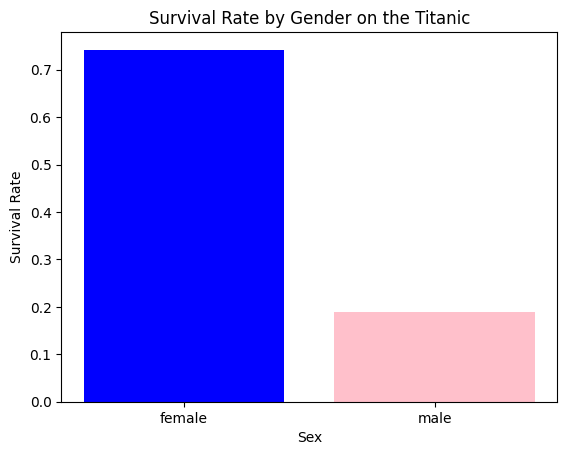